In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
from highlight_text import ax_text, fig_text
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer.utils import FontManager
import matplotlib.patheffects as path_effects

from highlight_text import ax_text
from PIL import Image
from mplsoccer import add_image
import matplotlib.ticker as ticker
import urllib
from urllib.request import urlopen

from sklearn.cluster import KMeans
import matplotlib.patches as patches

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

In [3]:
def plot_blank(ax):
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='#f5f5f5', line_color='#f5f5f5', corner_arcs=True)
    pitch.draw(ax=ax)

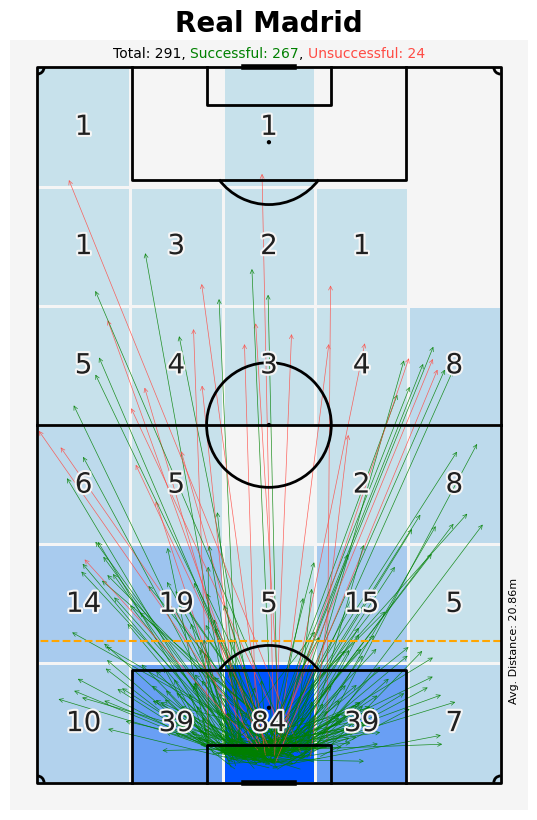

In [15]:
def plot_goalkick(ax,team_name):
    df_gk = df[(df['teamName']==team_name) & (df['qualifiers'].str.contains('GoalKick'))]
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='#f5f5f5', line_color='k', corner_arcs=True, line_zorder=5)
    pitch.draw(ax=ax)
    s=0
    u=0
    # setting the custom colormap
    pearl_earring_cmap1 = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors", ['#c7e1eb', '#0055ff'], N=20)
    path_eff = [path_effects.Stroke(linewidth=3, foreground='#f5f5f5'), path_effects.Normal()]
    bin_statistic1 = pitch.bin_statistic(df_gk.endX, df_gk.endY, bins=(6,5), statistic='count', normalize=False)
    mask = bin_statistic1['statistic'] == 0
    bin_statistic1['statistic'] = np.ma.masked_where(mask, bin_statistic1['statistic'])
    pitch.heatmap(bin_statistic1, ax=ax, cmap=pearl_earring_cmap1, edgecolors='#f5f5f5', linestyle='--', zorder=1)
    labels = pitch.label_heatmap(bin_statistic1, color='#202020', fontsize=20, ax=ax, zorder=5, ha='center', va='center', exclude_zeros=True, 
                                 str_format='{:.0f}', path_effects=path_eff)
    for index, row in df_gk.iterrows():
        if row['outcomeType']=='Successful':
            arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', zorder=2, color='g', #479bf5
                                            mutation_scale=7, alpha=0.85, linewidth=0.5)
            ax.add_patch(arrow)
            s+=1
        if row['outcomeType']=='Unsuccessful':
            arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', zorder=2, color='#ff4b44', 
                                            mutation_scale=7, alpha=0.85, linewidth=0.5)
            ax.add_patch(arrow)
            u+=1
    avg_dis = round(df_gk['endX'].mean(),2)
    ax.set_title(f'{team_name}',fontsize=20,fontweight='bold')
    ax_text(34, 107, s=f'Total: {s+u}, <Successful: {s}>, <Unsuccessful: {u}>',highlight_textprops=[{'color':'g'},{'color':'#ff4b44'}],
            ha='center',va='center',ax=ax)
    ax.text(-2, avg_dis, f'Avg. Distance: {avg_dis}m',fontsize=8,rotation=90,ha='center',va='center')
    ax.hlines(avg_dis, xmin=0, xmax=68, color='orange', linestyle='--')
    return

fig,ax=plt.subplots(figsize=(10,10))
plot_goalkick(ax,'Real Madrid')

Text(0.19, 0.92, 'La Liga season 2023-24 | made by: @LaLigaStatsball @adnaaan433')

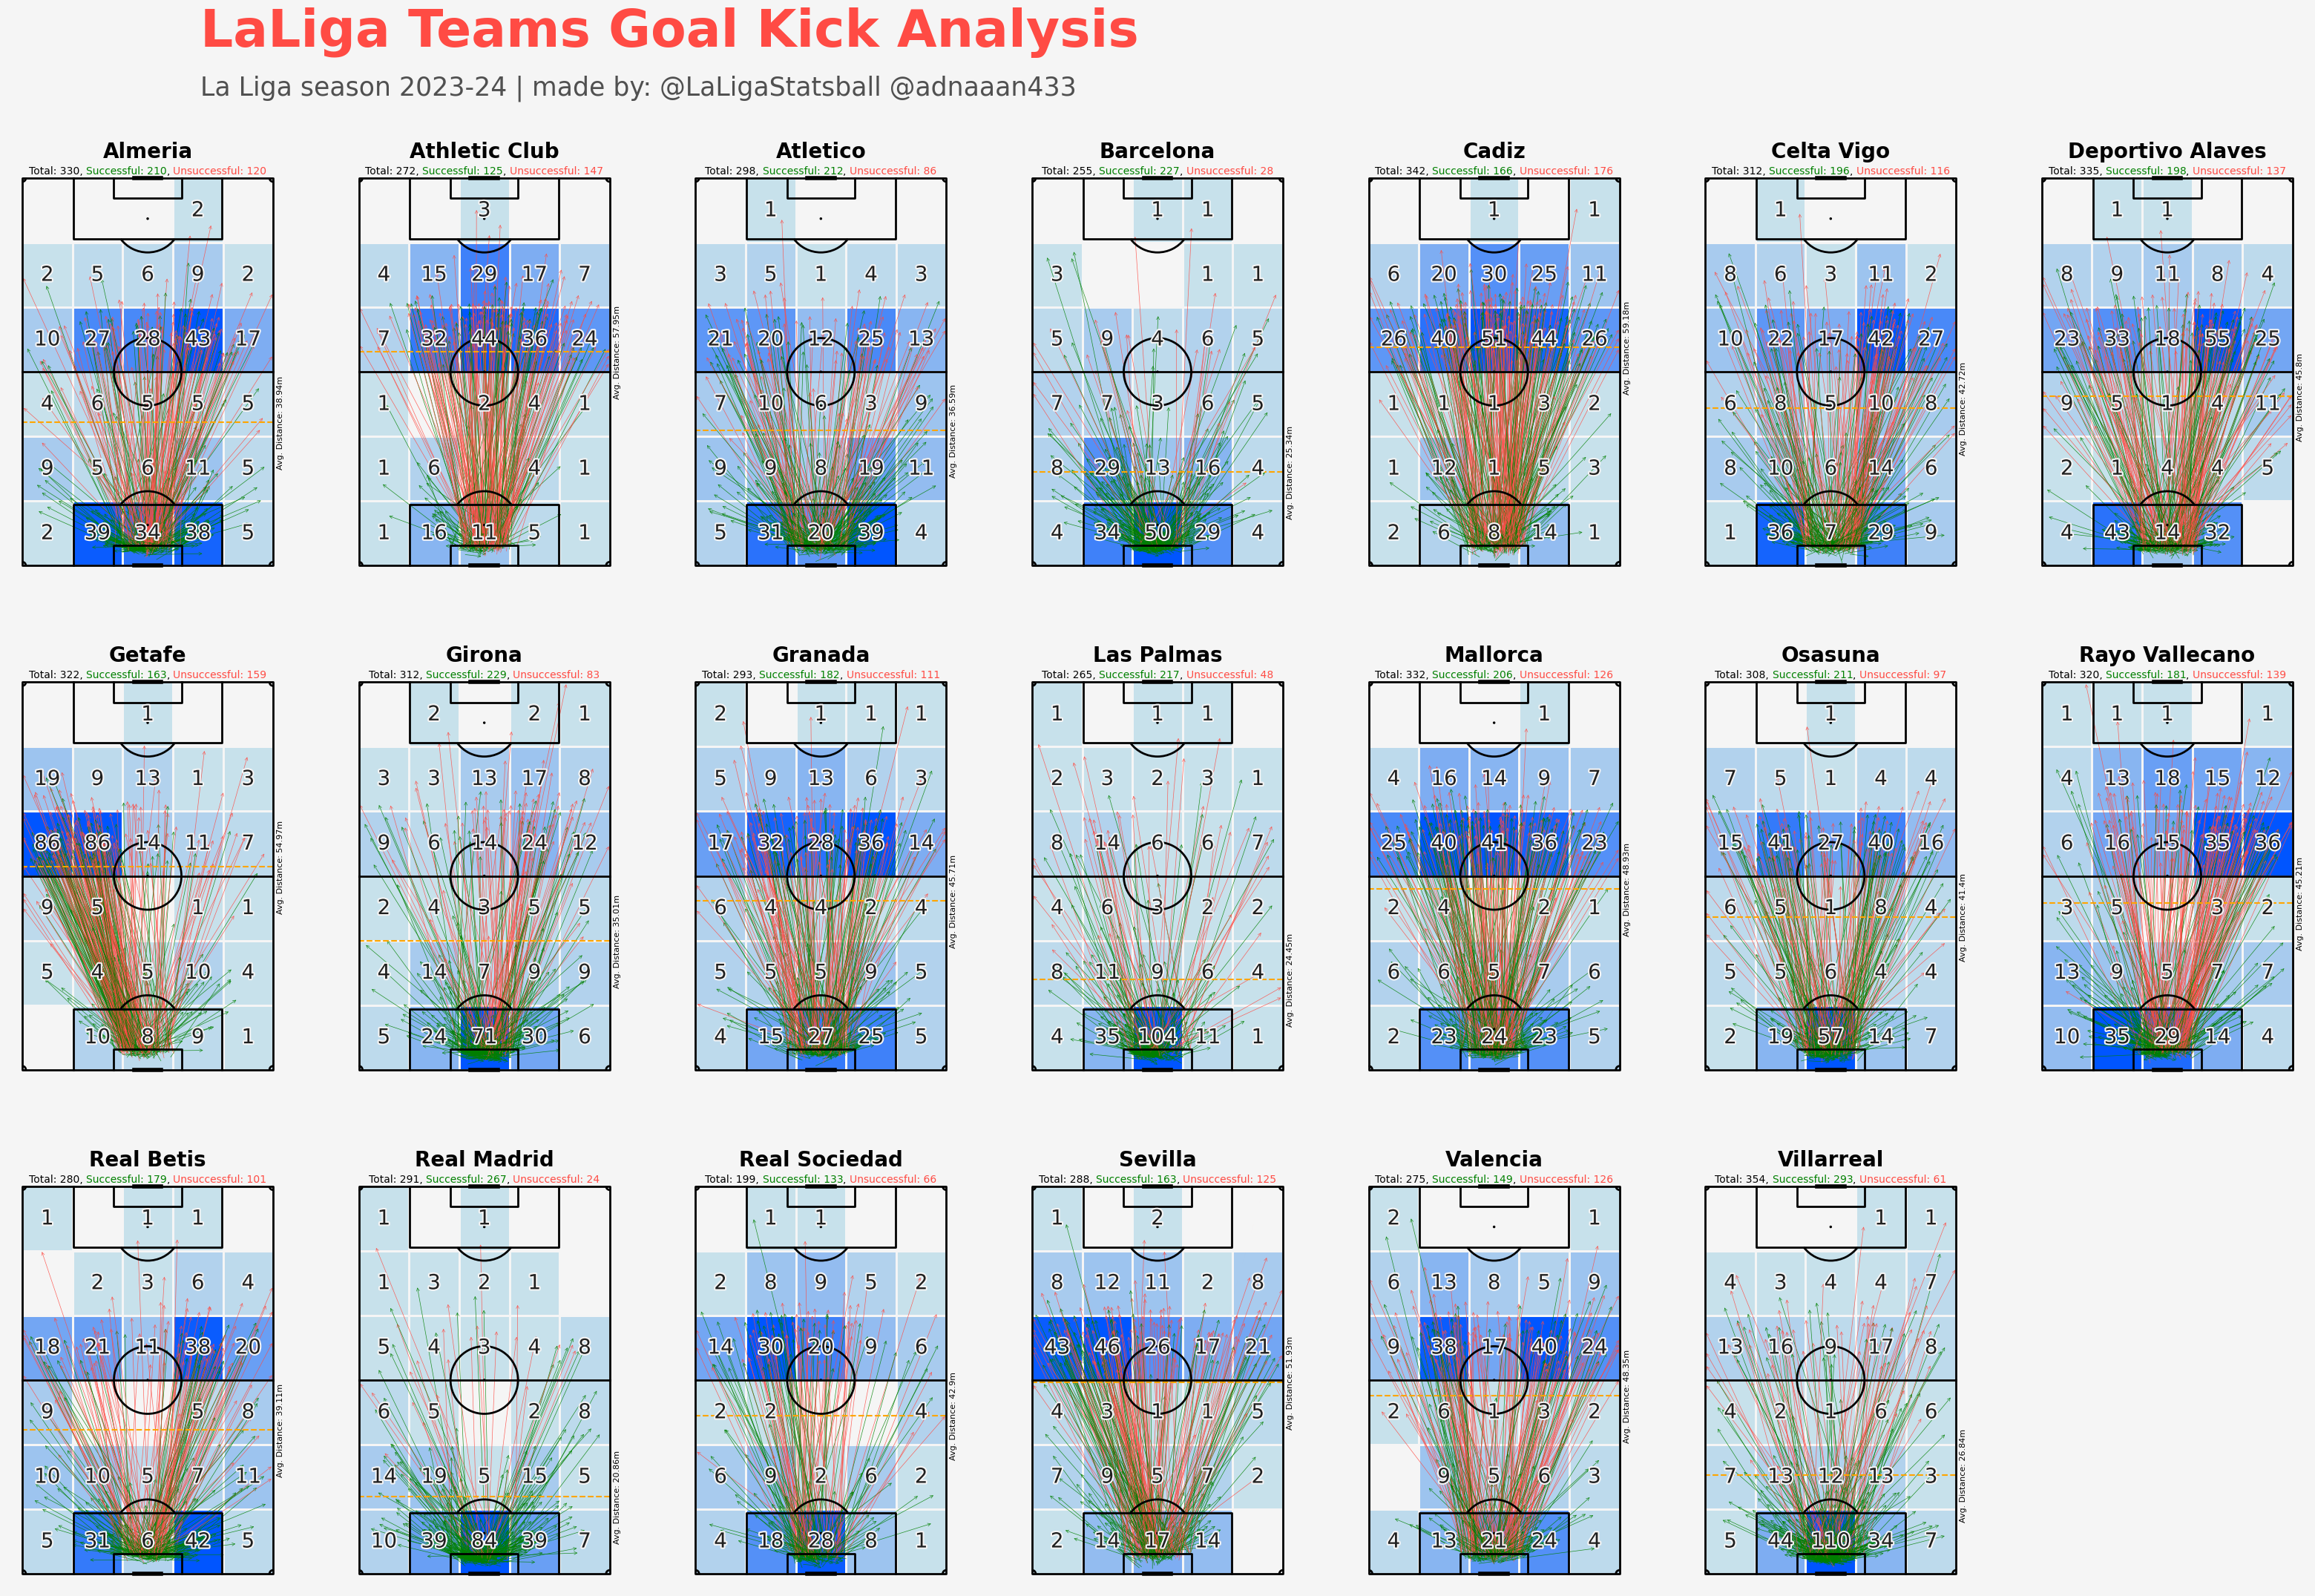

In [16]:
fig,axs=plt.subplots(3,7, figsize=(40,25), facecolor='#f5f5f5')
# team_names = df['teamName'].unique()
# i=0
# j=0
# for team_name in team_names:
#     if j < 5:
#         plot_goalkick(axs[i,j],team_name)
#         j+=1
#     else:
#         i+=1
#         j=0
#         plot_goalkick(axs[i,j],team_name)

plot_goalkick(axs[0,0],'Almeria')
plot_goalkick(axs[0,1],'Athletic Club')
plot_goalkick(axs[0,2],'Atletico')
plot_goalkick(axs[0,3],'Barcelona')
plot_goalkick(axs[0,4],'Cadiz')
plot_goalkick(axs[0,5],'Celta Vigo')
plot_goalkick(axs[0,6],'Deportivo Alaves')

plot_goalkick(axs[1,0],'Getafe')
plot_goalkick(axs[1,1],'Girona')
plot_goalkick(axs[1,2],'Granada')
plot_goalkick(axs[1,3],'Las Palmas')
plot_goalkick(axs[1,4],'Mallorca')
plot_goalkick(axs[1,5],'Osasuna')
plot_goalkick(axs[1,6],'Rayo Vallecano')

plot_goalkick(axs[2,0],'Real Betis')
plot_goalkick(axs[2,1],'Real Madrid')
plot_goalkick(axs[2,2],'Real Sociedad')
plot_goalkick(axs[2,3],'Sevilla')
plot_goalkick(axs[2,4],'Valencia')
plot_goalkick(axs[2,5],'Villarreal')
plot_blank(axs[2,6])

fig.text(0.19, 0.95, 'LaLiga Teams Goal Kick Analysis', color='#ff4b44', fontweight='bold', fontsize=50, ha='left', va='center')
fig.text(0.19, 0.92, 'La Liga season 2023-24 | made by: @LaLigaStatsball @adnaaan433', 
         color='#505050', fontsize=25, ha='left', va='center')